# Итоговая работа по курсу «Feature engineering и предобработка данных»

In [1]:
# Common imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as sts
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

In [2]:
# 1. Загрузить файл data_breast.csv

In [3]:
df = pd.read_csv('data_breast.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Удалим столбец Unnamed: 32, который не несет смысловой нагрузки

In [4]:
df = df.drop('Unnamed: 32', axis = 1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Еще удалим столбец id, который просто является индентификатором и ни на что не влияет в анализе

In [5]:
df = df.drop('id', axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


В данном файле собрана расчетная информация с обработанных изображений биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –malicious). Описание данных доступно на сайте

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [7]:
# 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Рассчитываются все показатели, кроме моды. std - отклонение, mean - среднее, 50% - медиана, min, max - мин/макс Моду считаем отдельно.

In [9]:
df.iloc[:,1:].mode()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,12.34,14.93,82.61,512.2,0.1007,0.1147,0.0,0.0,0.1601,0.05667,...,12.36,17.70,101.7,284.4,0.1216,0.1486,0.0,0.0,0.2226,0.07427
1,NaN,15.70,87.76,NaN,NaN,0.1206,NaN,NaN,0.1714,0.05907,...,NaN,27.26,105.9,402.8,0.1223,0.3416,NaN,NaN,0.2369,NaN
2,NaN,16.84,134.70,NaN,NaN,NaN,NaN,NaN,0.1717,0.05913,...,NaN,NaN,117.7,439.6,0.1234,NaN,NaN,NaN,0.2383,NaN
3,NaN,16.85,NaN,NaN,NaN,NaN,NaN,NaN,0.1769,0.06113,...,NaN,NaN,NaN,458.0,0.1256,NaN,NaN,NaN,0.2972,NaN
4,NaN,17.46,NaN,NaN,NaN,NaN,NaN,NaN,0.1893,0.06782,...,NaN,NaN,NaN,472.4,0.1275,NaN,NaN,NaN,0.3109,NaN
5,NaN,18.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,489.5,0.1312,NaN,NaN,NaN,0.3196,NaN
6,NaN,18.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,546.7,0.1347,NaN,NaN,NaN,NaN,NaN
7,NaN,19.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,547.4,0.1401,NaN,NaN,NaN,NaN,NaN
8,NaN,20.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,624.1,0.1415,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,698.8,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [11]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
# 3. Выбрать стратегию для работы с пропущенными значениями.

In [13]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Как видим, пропущенных значений - нет. 
Но надо заменить значения в столбце diagnosis, где B(доброкачественные) - 0, а M(злокачественные) - 1 

In [14]:
df['diagnosis'] = df['diagnosis'].map(dict(B = 0, M = 1))

In [15]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
# 4. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [17]:
corr_matrix = df.corr()
corr_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


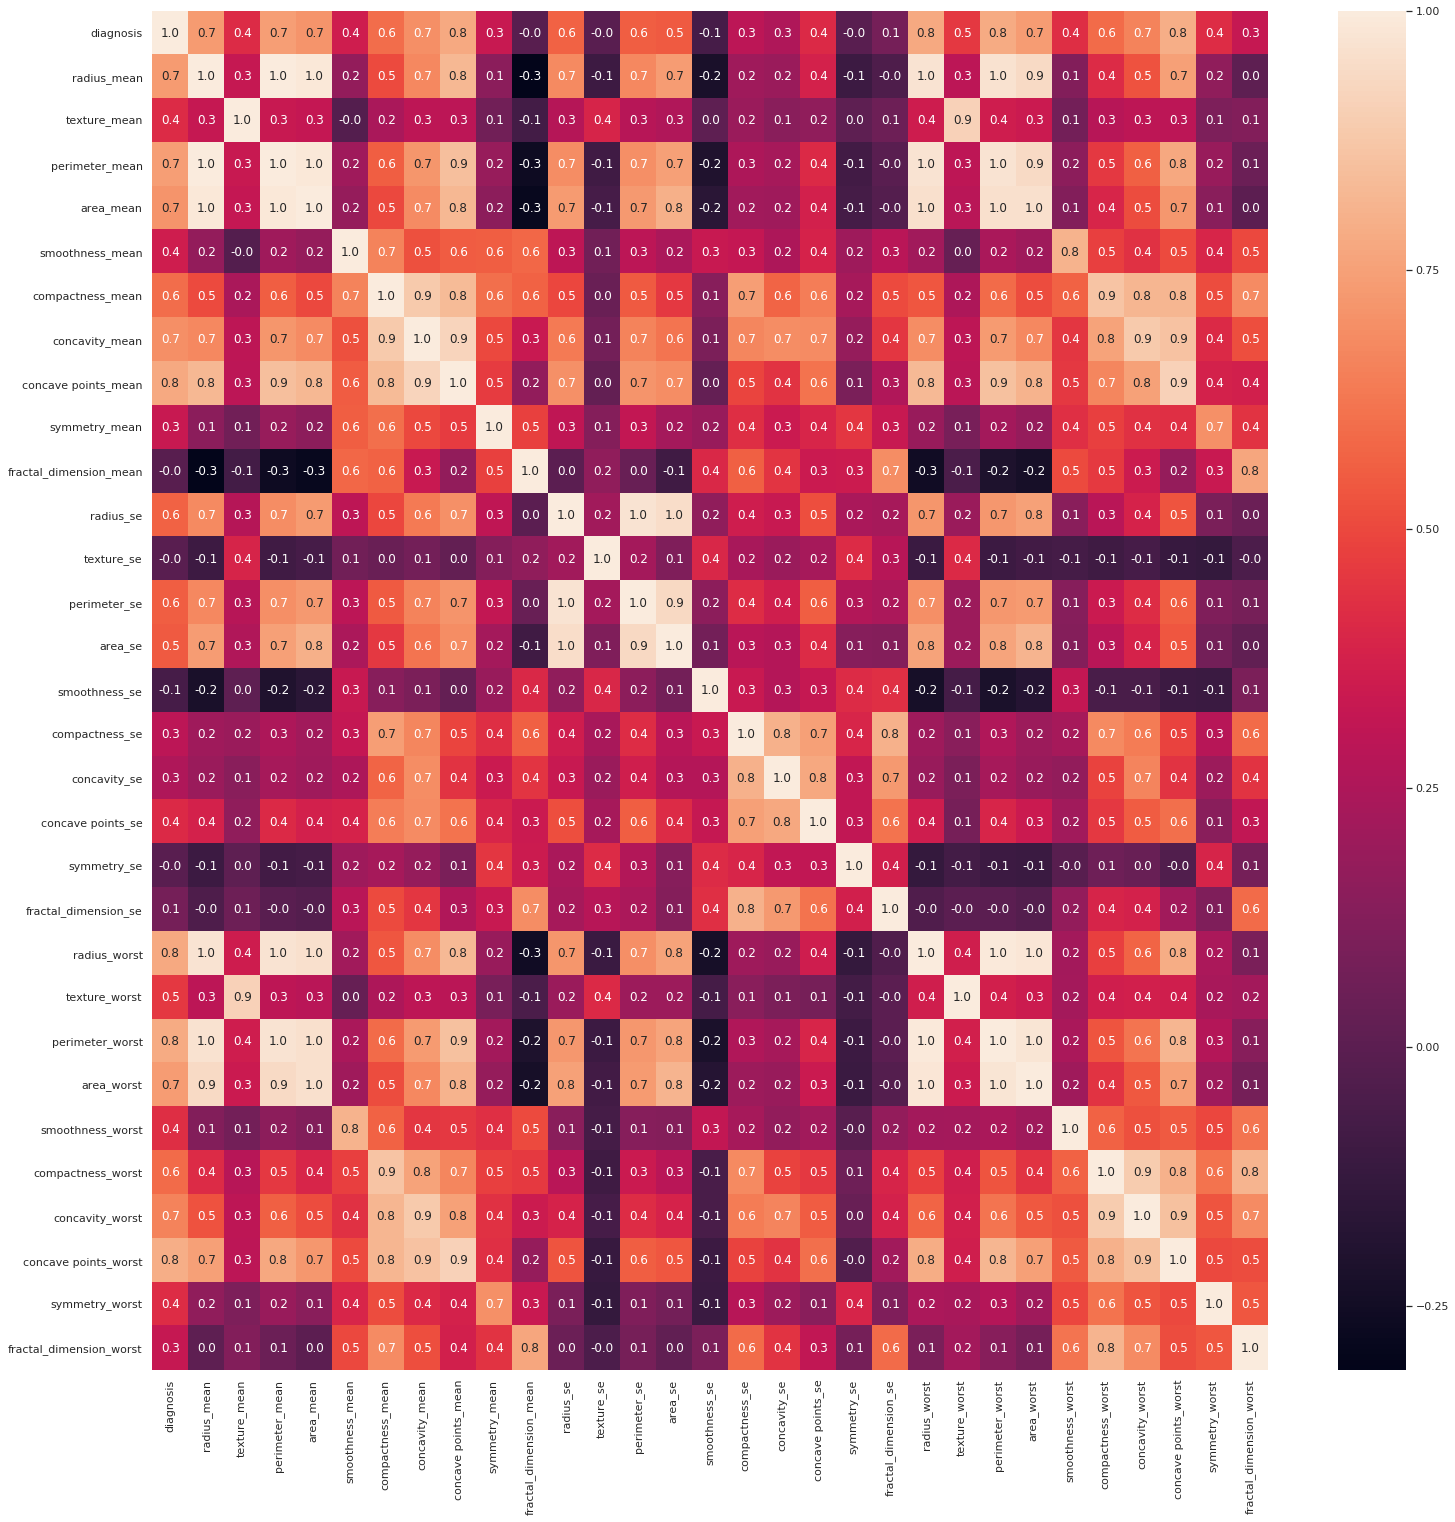

In [18]:
sns.set(rc={'figure.figsize':(25, 25)})
sns.heatmap(corr_matrix, annot = True, fmt= '.1f')

In [19]:
# 5. Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …).

Оставим те переменные, которые наиболее влияют на diagnosis, т.е. те у которых корреляция больше 0.60

In [20]:
ls = ['radius_mean',
    'perimeter_mean',
    'area_mean',
    'concavity_mean',
    'concave points_mean',
    'radius_worst',
    'perimeter_worst',
    'area_worst',
    'concavity_worst',
    'concave points_worst']

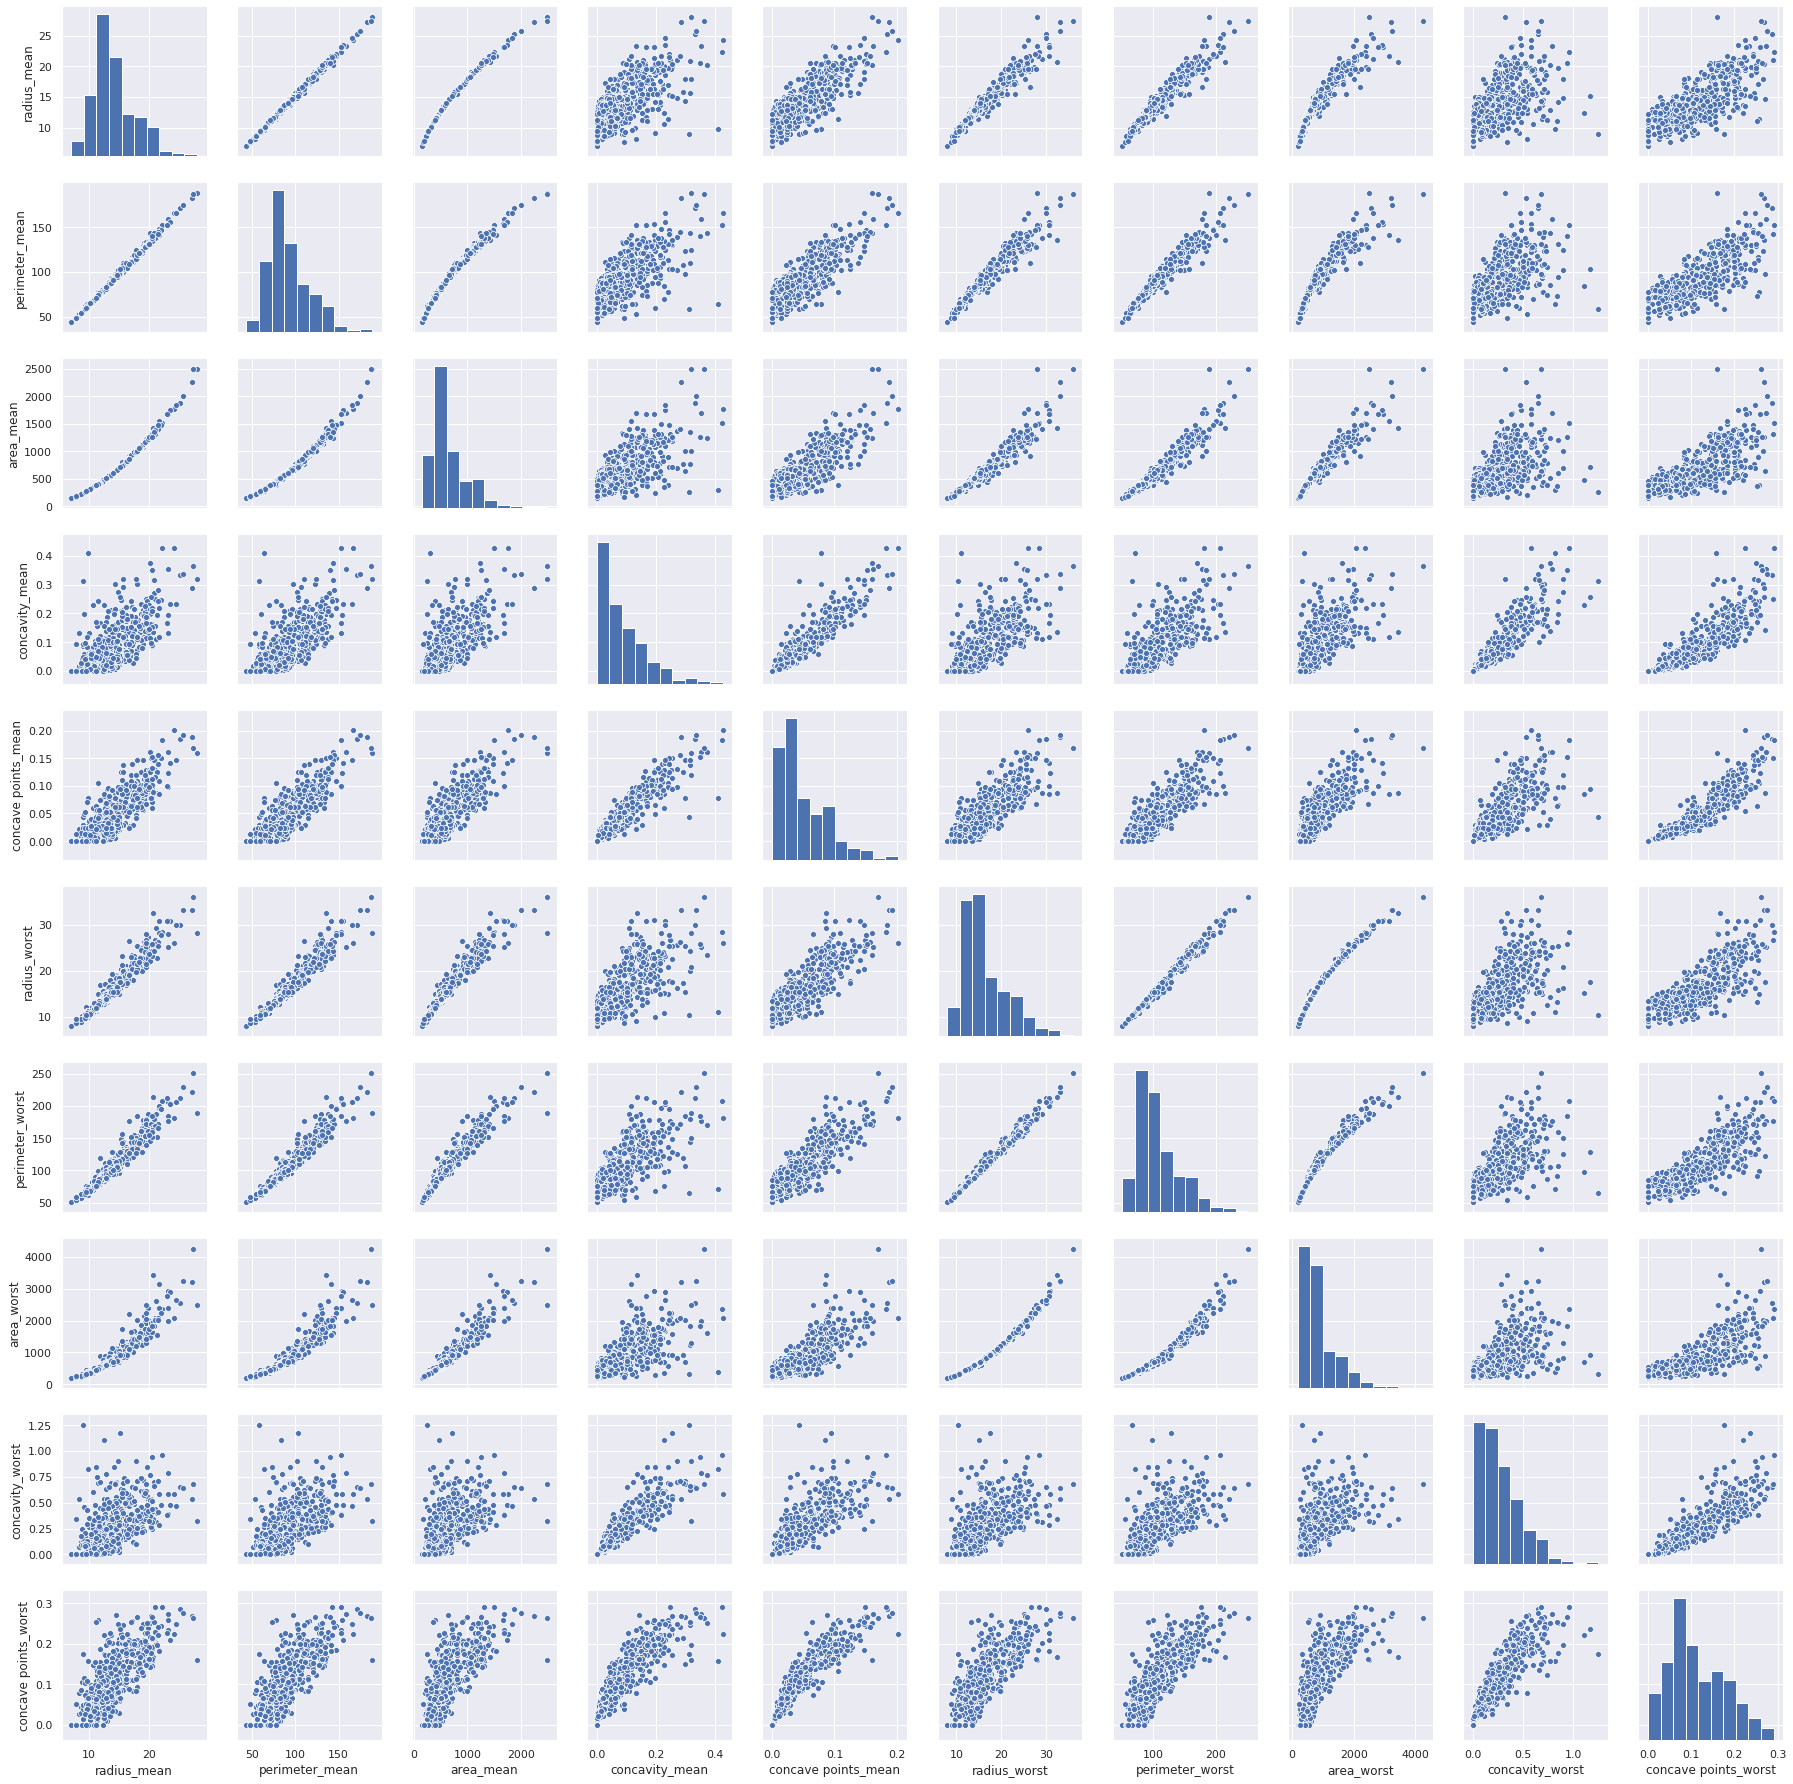

In [21]:
sns.pairplot(data=df.loc[:,ls])

Из графиков видно, что многие признаки попарно скоррелированы. Например, 'radius_worst','perimeter_worst' и 'area_worst'. 

In [25]:
# 6. С помощью статистических методов проверить взаимосвязи между переменными.

In [26]:
sts.ttest_ind(df['radius_worst'], df['perimeter_worst'])

Ttest_indResult(statistic=-63.935294276531245, pvalue=0.0)

In [27]:
sts.ttest_ind(df['radius_worst'], df['area_worst'])

Ttest_indResult(statistic=-36.20990150819468, pvalue=1.6006755752247593e-191)

In [28]:
# 7. Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. 
# Какой из этих двух подходов даст лучший результат при  классификации?

Удалим незначимые признаки, то есть те признаки, которые имеют низкую корреляцию с diagnosis.

In [29]:
filtered = corr_matrix[(corr_matrix['diagnosis'] <= 0.20) & (corr_matrix['diagnosis'] >= -0.20)]
df.drop(list(filtered.index), axis =1, inplace = True)

Используем RFE для выбора переменных

In [30]:
X = df.drop(['diagnosis'],axis = 1)
y = df['diagnosis']

In [31]:
estimator = RandomForestClassifier()

In [32]:
selector = RFE(estimator = estimator, n_features_to_select = 15, step =1 )
rfe_fit = selector.fit(X , y)

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/skl

In [33]:
print('Выберем 15 лучших переменных:', X.columns[rfe_fit.support_])

Выберем 15 лучших переменных: Index(['radius_mean', 'texture_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'concave points_worst', 'fractal_dimension_worst'],
      dtype='object')


In [34]:
red_cols = list(X.columns[rfe_fit.support_])

In [35]:
# 8. Рассчитать Feature Selection для выбранных переменных.

Разобьем данные на test и train

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

Стандартизируем данные

In [37]:
X_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X_train), columns = X.columns)
X_test_scaled = pd.DataFrame(StandardScaler().fit_transform(X_test), columns = X.columns)

Стандартизируем наши усеченные данные

In [38]:
X_train_scaled_reduced = X_train_scaled.loc[:, red_cols]

In [39]:
X_test_scaled_reduced = X_test_scaled.loc[:, red_cols]

In [40]:
# 9. Решить задачу бинарной классификации и предсказать переменную ”Diagnosis ” 
# протестировав как минимум 2 алгоритма. Использовать те алгоритмы, 
# которые позволяют предсказать вероятность класса (proba). Рассчитать и вывести вероятность каждого класса.
# 10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

RandomForestClassifier

In [41]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
y_pred_rfc_test = rfc.predict(X_test_scaled)
y_pred_rfc_train = rfc.predict(X_train_scaled)

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
accuracy_rfc = accuracy_score(y_test,y_pred_rfc_test)
f1_score_rfc = f1_score(y_test,y_pred_rfc_test)
precision_score_rfc = precision_score(y_test,y_pred_rfc_test)
recall_score_rfc = recall_score(y_test,y_pred_rfc_test)
print(f'Accuracy: {accuracy_rfc:.2f}')
print(f'F1_Score: {f1_score_rfc:.2f}')
print(f'Precision_Score: {precision_score_rfc:.2f}')
print(f'Recall_Score: {recall_score_rfc:.2f}')

Accuracy: 0.96
F1_Score: 0.94
Precision_Score: 0.97
Recall_Score: 0.91


In [43]:
y_pred_rfc_test_proba = rfc.predict_proba(X_test_scaled)
y_pred_rfc_test_proba

array([[0.9, 0.1],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.1, 0.9],
       [0.3, 0.7],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.9, 0.1],
       [0.1, 0.9],
       [1. , 0. ],
       [0. , 1. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.9, 0.1],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.7, 0.3],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. ,

In [44]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled_reduced,y_train)
y_pred_rfc_test_reduced = rfc.predict(X_test_scaled_reduced)
y_pred_rfc_train_reduced = rfc.predict(X_train_scaled_reduced)

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [45]:
accuracy_rfc_reduced = accuracy_score(y_test,y_pred_rfc_test_reduced)
f1_score_rfc_reduced = f1_score(y_test,y_pred_rfc_test_reduced)
precision_score_rfc_reduced = precision_score(y_test,y_pred_rfc_test_reduced)
recall_score_rfc_reduced = recall_score(y_test,y_pred_rfc_test_reduced)
print(f'Accuracy_reduced: {accuracy_rfc_reduced:.2f}')
print(f'F1_Score_reduced: {f1_score_rfc_reduced:.2f}')
print(f'Precision_Score_reduced: {precision_score_rfc_reduced:.2f}')
print(f'Recall_Score_reduced: {recall_score_rfc_reduced:.2f}')

Accuracy_reduced: 0.96
F1_Score_reduced: 0.95
Precision_Score_reduced: 1.00
Recall_Score_reduced: 0.91


In [46]:
y_pred_rfc_test_reduced_proba = rfc.predict_proba(X_test_scaled_reduced)
y_pred_rfc_test_reduced_proba

array([[1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [0. , 1. ],
       [0.7, 0.3],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. ,

LogisticRegression

In [47]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled,y_train)
y_pred_logreg_test = logreg.predict(X_test_scaled)
y_pred_logreg_train = logreg.predict(X_train_scaled)

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
accuracy_logreg = accuracy_score(y_test,y_pred_logreg_test)
f1_score_logreg = f1_score(y_test,y_pred_logreg_test)
precision_score_logreg = precision_score(y_test,y_pred_logreg_test)
recall_score_logreg = recall_score(y_test,y_pred_logreg_test)
print(f'Accuracy: {accuracy_logreg:.2f}')
print(f'F1_Score: {f1_score_logreg:.2f}')
print(f'Precision_Score: {precision_score_logreg:.2f}')
print(f'Recall_Score: {recall_score_logreg:.2f}')

Accuracy: 0.98
F1_Score: 0.98
Precision_Score: 1.00
Recall_Score: 0.95


In [49]:
y_pred_logreg_test_proba = logreg.predict_proba(X_test_scaled)
y_pred_logreg_test_proba

array([[9.33528668e-01, 6.64713323e-02],
       [7.51048054e-06, 9.99992490e-01],
       [5.41684760e-03, 9.94583152e-01],
       [9.99724506e-01, 2.75494234e-04],
       [9.99983079e-01, 1.69206171e-05],
       [2.52332821e-10, 1.00000000e+00],
       [1.12795906e-09, 9.99999999e-01],
       [3.93522426e-02, 9.60647757e-01],
       [7.89808633e-01, 2.10191367e-01],
       [9.99744278e-01, 2.55721612e-04],
       [9.76486479e-01, 2.35135215e-02],
       [1.22969208e-02, 9.87703079e-01],
       [9.95372261e-01, 4.62773923e-03],
       [8.38108158e-02, 9.16189184e-01],
       [9.99366667e-01, 6.33332726e-04],
       [1.82070076e-04, 9.99817930e-01],
       [9.99004690e-01, 9.95309627e-04],
       [9.99994420e-01, 5.57965911e-06],
       [9.99999043e-01, 9.56982888e-07],
       [1.49490950e-06, 9.99998505e-01],
       [9.58123495e-01, 4.18765053e-02],
       [9.95281999e-01, 4.71800082e-03],
       [6.99834013e-09, 9.99999993e-01],
       [9.99964182e-01, 3.58183067e-05],
       [9.993905

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled_reduced,y_train)
y_pred_logreg_test_reduced = logreg.predict(X_test_scaled_reduced)
y_pred_logreg_train_reduced = logreg.predict(X_train_scaled_reduced)

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
accuracy_logreg_reduced = accuracy_score(y_test,y_pred_logreg_test_reduced)
f1_score_logreg_reduced = f1_score(y_test,y_pred_logreg_test_reduced)
precision_score_logreg_reduced = precision_score(y_test,y_pred_logreg_test_reduced)
recall_score_logreg_reduced = recall_score(y_test,y_pred_logreg_test_reduced)
print(f'Accuracy_reduced: {accuracy_logreg_reduced:.2f}')
print(f'F1_Score_reduced: {f1_score_logreg_reduced:.2f}')
print(f'Precision_Score_reduced: {precision_score_logreg_reduced:.2f}')
print(f'Recall_Score_reduced: {recall_score_logreg_reduced:.2f}')

Accuracy_reduced: 0.98
F1_Score_reduced: 0.98
Precision_Score_reduced: 1.00
Recall_Score_reduced: 0.95


In [52]:
y_pred_logreg_test_reduced_proba = logreg.predict_proba(X_test_scaled_reduced)
y_pred_logreg_test_reduced_proba

array([[9.55740793e-01, 4.42592069e-02],
       [2.09813028e-05, 9.99979019e-01],
       [1.29443909e-02, 9.87055609e-01],
       [9.97371362e-01, 2.62863838e-03],
       [9.99728239e-01, 2.71760575e-04],
       [9.20373555e-10, 9.99999999e-01],
       [6.52850085e-09, 9.99999993e-01],
       [4.61239644e-02, 9.53876036e-01],
       [8.32896039e-01, 1.67103961e-01],
       [9.99602089e-01, 3.97910524e-04],
       [9.73676393e-01, 2.63236066e-02],
       [2.06262435e-02, 9.79373757e-01],
       [9.96266566e-01, 3.73343359e-03],
       [1.02660868e-01, 8.97339132e-01],
       [9.99563909e-01, 4.36091031e-04],
       [4.60724744e-05, 9.99953928e-01],
       [9.98468266e-01, 1.53173359e-03],
       [9.99967348e-01, 3.26516776e-05],
       [9.99998206e-01, 1.79364645e-06],
       [5.11961879e-06, 9.99994880e-01],
       [9.31035193e-01, 6.89648074e-02],
       [9.94028478e-01, 5.97152207e-03],
       [5.79385151e-08, 9.99999942e-01],
       [9.99956777e-01, 4.32234266e-05],
       [9.994373

Вывод: Большую точность показывает модель логистической регрессии по сравнению с RandomForest, при этом модель показывает одинаковую точность на усеченных данных и на полном сете. То есть наша более простая модель логистической регрессии на меньшем датасете уже дает хорошую точность.  